In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('Product_Ratings.csv')

In [17]:
df

,Unnamed: 0,Unnamed: 0.1,Review,Rating
0,0,0,What !!! 13k priced phone with Snapdragon 45...,4
1,1,1,Pro -1. Huge battery - 5000mah Hustle free u...,5
2,2,2,The phone comes with a 6.40-inch touchscreen...,1
3,3,3,Samsung M11 Pros- 1) Display-- Nice but of ...,1
4,4,4,I have bought this phone (4GB ram version) w...,5
...,...,...,...,...
23995,23995,5995,Nice product.. worth for 💰,4
23996,23996,5996,Zebronics has always been making supremely g...,4
23997,23997,5997,Haven't used the remote yet but it is perfec...,5
23998,23998,5998,Thanks for service but this product is when ...,5


In [18]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Review', 'Rating'], dtype='object')

In [19]:
df.shape

(24000, 4)

In [20]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Unnamed: 0.1  \
0               0             0   
1               1             1   
2               2             2   
3               3             3   
4               4             4   
...           ...           ...   
23995       23995          5995   
23996       23996          5996   
23997       23997          5997   
23998       23998          5998   
23999       23999          5999   

                                                  Review  Rating  
0        What !!! 13k priced phone with Snapdragon 45...       4  
1        Pro -1. Huge battery - 5000mah Hustle free u...       5  
2        The phone comes with a 6.40-inch touchscreen...       1  
3        Samsung M11 Pros- 1) Display--  Nice but of ...       1  
4        I have bought this phone (4GB ram version) w...       5  
...                                                  ...     ...  
23995                         Nice product.. worth for 💰       4  
23996    Ze

In [21]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Review          0
Rating          0
dtype: int64

In [22]:
# let's drop Unnamed column
df=df.drop(columns=["Unnamed: 0","Unnamed: 0.1"], axis=1)

In [23]:
df

,Review,Rating
0,What !!! 13k priced phone with Snapdragon 45...,4
1,Pro -1. Huge battery - 5000mah Hustle free u...,5
2,The phone comes with a 6.40-inch touchscreen...,1
3,Samsung M11 Pros- 1) Display-- Nice but of ...,1
4,I have bought this phone (4GB ram version) w...,5
...,...,...
23995,Nice product.. worth for 💰,4
23996,Zebronics has always been making supremely g...,4
23997,Haven't used the remote yet but it is perfec...,5
23998,Thanks for service but this product is when ...,5


In [24]:
df["Rating"] = pd.to_numeric(df["Rating"])

In [25]:
# Let's see how our Target column is distributed
df['Rating'].value_counts()

1    8404
5    7520
4    5086
3    2214
2     776
Name: Rating, dtype: int64

C:\Users\MARJAN\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

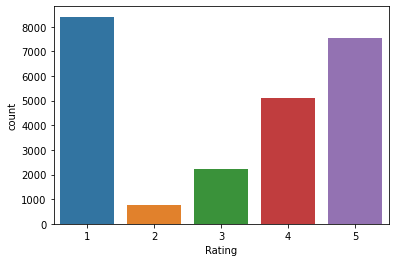

In [26]:
# Let's see how our Target column is distributed
import seaborn as sns
sns.countplot('Rating',data=df)

In [27]:
df['Review'] = df['Review'].str.lower()

In [28]:
df['Review']=df['Review'].str.replace('[^a-zA-z]',' ')

In [29]:
df['Review']=df['Review'].str.strip()

In [30]:
df['Review']=df['Review'].str.split()

In [31]:
df.head()

,Review,Rating
0,"[what, k, priced, phone, with, snapdragon, pro...",4
1,"[pro, huge, battery, mah, hustle, free, usage,...",5
2,"[the, phone, comes, with, a, inch, touchscreen...",1
3,"[samsung, m, pros, display, nice, but, of, cou...",1
4,"[i, have, bought, this, phone, gb, ram, versio...",5


In [32]:
#Removing Stopwords
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MARJAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['Review']=df['Review'].apply(lambda x:[w for w in x if w not in stop])

In [34]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

In [35]:
df['Review']=df['Review'].apply(lambda x:[stemmer.stem(w)for w in x])

In [36]:
df.head()

,Review,Rating
0,"[k, price, phone, snapdragon, processor, worst...",4
1,"[pro, huge, batteri, mah, hustl, free, usag, h...",5
2,"[phone, come, inch, touchscreen, display, reso...",1
3,"[samsung, pro, display, nice, cours, fhd, disp...",1
4,"[bought, phone, gb, ram, version, moto, g, pow...",5


In [37]:
df['Review']=df['Review'].apply(lambda x:" ".join(x))

In [38]:
df.head()

,Review,Rating
0,k price phone snapdragon processor worst thing...,4
1,pro huge batteri mah hustl free usag hour huge...,5
2,phone come inch touchscreen display resolut x ...,1
3,samsung pro display nice cours fhd display alw...,1
4,bought phone gb ram version moto g power lite ...,5


In [39]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

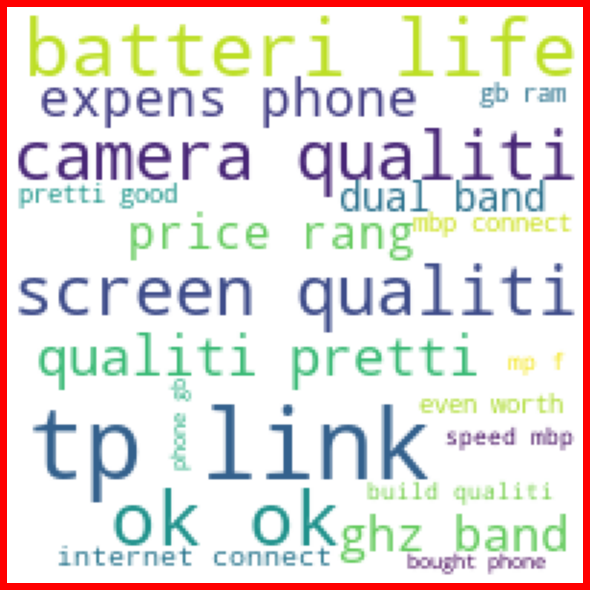

In [42]:
best = df['Review'][df['Rating'] == 5]
best_cloud = WordCloud(width=200,height=200,background_color='white',max_words=20).generate(' '.join(best))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(best_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

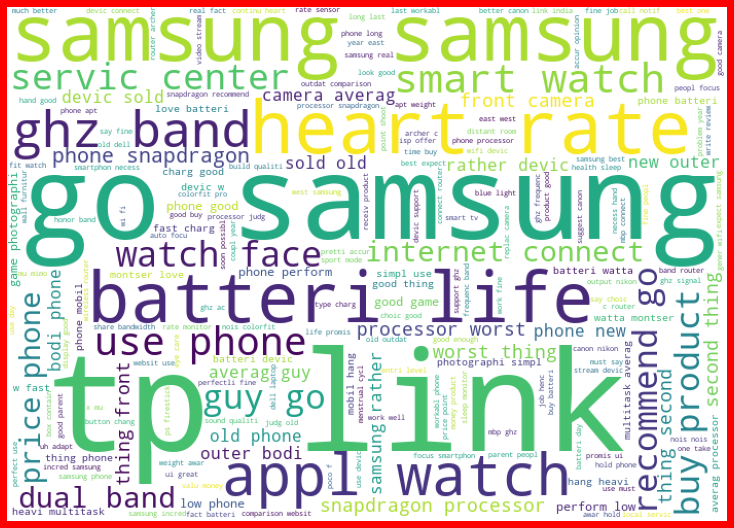

In [44]:
better = df['Review'][df['Rating']==4]

better_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(better))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(better_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

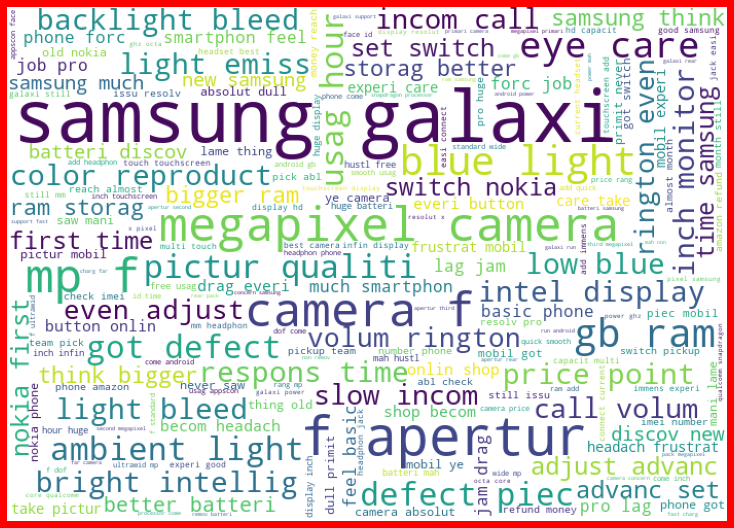

In [45]:
good = df['Review'][df['Rating']==3]

good_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(good))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(good_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

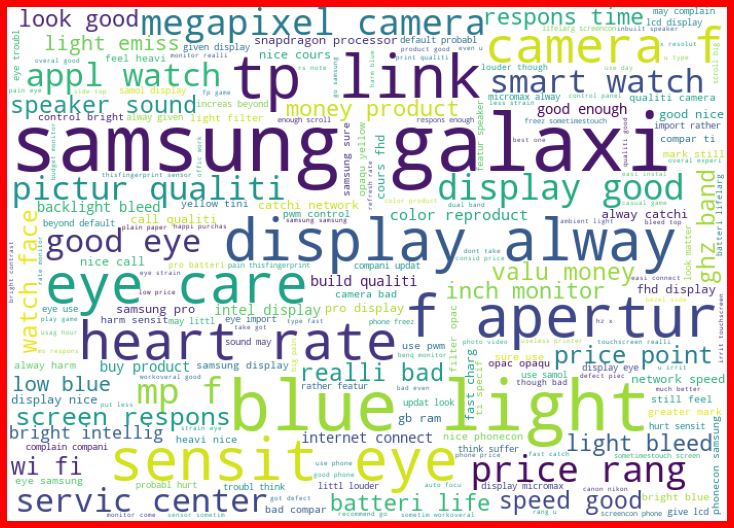

In [47]:
bad = df['Review'][df['Rating']==1]

bad_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(bad))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(bad_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [48]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Review'])

X = features
y = df['Rating']
X.shape

(24000, 1291)

In [49]:
y.shape

(24000,)

In [50]:
# Libraries for training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()

In [51]:
# List of Models
models=[]
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [52]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [53]:
Model=[]
Score=[]
Acc_score=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,X,y)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

*************************** MultinomialNB() *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  90 is: 0.4791666666666667


Learning Score :  0.47148809523809526
Accuracy Score :  0.4791666666666667
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.28      0.37      2521
           2       0.34      0.48      0.40       233
           3       0.27      0.48      0.35       664
           4       0.42      0.61      0.50      1526
           5       0.64      0.61      0.63      2256

    accuracy                           0.48      7200
   macro avg       0.44      0.49      0.45      7200
weighted avg       0.51      0.48      0.48      7200



Confusion Matrix:
 [[ 714  106  499  817  385]
 [   0  112    0  121    0]
 [ 233  109  322    0    0]
 [ 115    0  108  924  379]
 [ 290    0  257  331 1378]]


*************************** DecisionTreeClassifier *************************

C:\Users\MARJAN\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max Accuracy Score corresponding to Random State  90 is: 0.49722222222222223


Learning Score :  0.5016071428571428
Accuracy Score :  0.4973611111111111
Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.65      0.52      2521
           2       0.00      0.00      0.00       233
           3       0.32      0.08      0.13       664
           4       0.44      0.34      0.38      1526
           5       0.64      0.61      0.63      2256

    accuracy                           0.50      7200
   macro avg       0.37      0.34      0.33      7200
weighted avg       0.48      0.50      0.47      7200



Confusion Matrix:
 [[1634    0   55  447  385]
 [ 116    0   56   61    0]
 [ 611    0   53    0    0]
 [ 631    0    0  516  379]
 [ 731    0    0  147 1378]]


*************************** AdaBoostClassifier *****************************


AdaBoostClassifier()




C:\Users\MARJAN\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max Accuracy Score corresponding to Random State  81 is: 0.4148611111111111


Learning Score :  0.4124404761904762
Accuracy Score :  0.4148611111111111
Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.32      0.35      2521
           2       0.14      0.10      0.12       233
           3       0.23      0.25      0.24       664
           4       0.41      0.43      0.42      1526
           5       0.49      0.59      0.54      2256

    accuracy                           0.41      7200
   macro avg       0.34      0.34      0.33      7200
weighted avg       0.41      0.41      0.41      7200



Confusion Matrix:
 [[ 801   56  336  604  724]
 [ 127   23    0   83    0]
 [ 374    0  166   32   92]
 [ 164   59   84  656  563]
 [ 544   21  143  207 1341]]




In [54]:
scores=pd.DataFrame({'Model': Model,'Learning Score': Score})
scores.style.background_gradient()

,Model,Learning Score
0,MultinomialNB(),47.148810
1,DecisionTreeClassifier,50.172619
2,RandomForestClassifier,50.160714
3,AdaBoostClassifier,41.244048


In [55]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
RF_pred=RF.predict(x_test)

In [57]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=RF_pred
test               

,Rating,Predicted values
14477,1,1
17400,1,1
1649,5,5
9890,4,1
6900,5,4
...,...,...
4614,5,5
7620,5,4
18646,1,5
9495,4,4
